# A/B Testing for CTR (Click Through Rate)

## Understanding the Experiment

Pictured below is a sample of LunarTech's sign up button. The experiment is to determine if the experimental button provides a higher Click Through Rate (CTR) than the control button. The sample data being used (ab_test_click_data.csv) was data collected through their website. There are 10,000 entries in the control and 10,000 entries in the experimental.

The Null Hypothesis is that the CTR is the same for both the control and experimental buttons.
The Alternative Hypothesis is that the CTR is different for the buttons.

<img src = "image.png" width = "1250">

## Loading CTR Data and Imports

Loading proper dependencies

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

Importing the data using pandas and checking to see if the first few rows look correct

In [5]:
#Using pandas to load and read the given .csv file
df_ab_test = pd.read_csv('ab_test_click_data.csv')

#Displaying a few rows to verify it was loaded correctly
print(df_ab_test.describe())
print(df_ab_test.head())
print(df_ab_test.groupby("group").sum("click"))

            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
         user_id  click
group                  
con    150005000   1989
exp     50005000   6116


## Light Data Exploration Using a Countplot

Using seaborn and matplotlib, a graph counting the results of both the control and experimental groups was created. The experimental group looks to have receieved a much higher CTR which appears promising. Indicating there may be a basis to reject the null hypothesis.

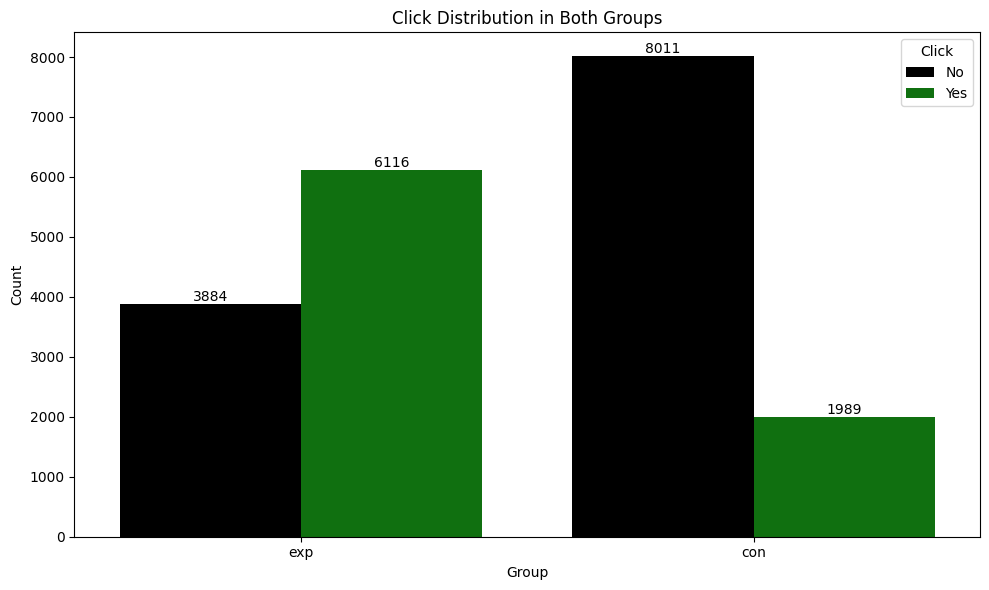

Average CTR for Control: 19.89%
Average CTR for Experimental: 61.16%


In [6]:
#Creating color palette for graph below
palette = {0: 'black', 1: 'green'}
#Graph stuff
plt.figure(figsize=(10,6))
ax = sns.countplot(x='group', hue = 'click', data = df_ab_test, palette = palette)
plt.title('Click Distribution in Both Groups')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title = 'Click', labels = ['No', 'Yes'])
#Labels the # amounts above the graphs
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()

#Calculating the average click through rate (CTR) for control and experimental groups
con_avg = sum((df_ab_test.group == 'con') & df_ab_test.click == 1) / sum(df_ab_test.group == 'con') * 100
exp_avg = sum((df_ab_test.group == 'exp') & df_ab_test.click == 1) / sum(df_ab_test.group == 'exp') * 100
print(f"Average CTR for Control: {con_avg:.2f}%")
print(f"Average CTR for Experimental: {exp_avg:.2f}%")

## Power Model Parameters

Setting the parameters for the power model. Alpha refers to the significance level, or the probability of rejecting the null hypothesis when it is true (5% in this case).
Delta refers to the minimum detectable effect, how much more effective the button needs to prove in order to be implemented

In [7]:
alpha = 0.05
print(f"Significance level (Alpha): {alpha}")

delta = 0.1 #New button needs to be 10%+ more effective than previous button to launch feature
print(f"Minimum Detectable Effect (Delta): {delta}")

Significance level (Alpha): 0.05
Minimum Detectable Effect (Delta): 0.1


Totaling the amount of people and clicks in both groups

In [8]:
X_con = sum((df_ab_test.group == 'con') & df_ab_test.click == 1)
X_exp = sum((df_ab_test.group == 'exp') & df_ab_test.click == 1)
N_con = sum((df_ab_test.group == 'con'))
N_exp = sum((df_ab_test.group == 'exp'))


print(f'Total in Control: {N_con}')
print(f"Clicks in Control: {X_con}")
print()
print(f'Total in Experimental: {N_exp}')
print(f"Clicks in Experimental: {X_exp}")

Total in Control: 10000
Clicks in Control: 1989

Total in Experimental: 10000
Clicks in Experimental: 6116


## Calculating Values for a Normal Distribution

Estimating the probability of clicking in both groups

In [9]:

p_con_hat = X_con / N_con
p_exp_hat = X_exp / N_exp

print(f"Probability of Clicking in Control: {p_con_hat}")
print(f"Probability of Clicking in Experimental: {p_exp_hat}")

p_pooled_hat = (X_con + X_exp) / (N_con + N_exp)

print(f"Pooled Click Probability: {p_pooled_hat}")



Probability of Clicking in Control: 0.1989
Probability of Clicking in Experimental: 0.6116
Pooled Click Probability: 0.40525


In [10]:
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con + 1/N_exp)
print(f"Pooled Variance: {pooled_variance}")

Pooled Variance: 4.82044875e-05


Values that will be graphed on the normal distribution below

In [11]:
SE = np.sqrt(pooled_variance)
print(f"Standard Error: {SE}")

Test_stat = (p_con_hat - p_exp_hat) / SE
print(f"Result for Two Sample Z-Test: {Test_stat}")

Z_crit = norm.ppf(1-alpha/2)
print(f"Z-Critical Value: {Z_crit}")

p_value = 2 * norm.sf(abs(Test_stat))
print(f"P Value: {p_value}")

Standard Error: 0.006942945160376826
Result for Two Sample Z-Test: -59.44163326469381
Z-Critical Value: 1.959963984540054
P Value: 0.0


## Graphing a Normal Distribution

Graphing various different aspects of the normal distribution graph. Showing just how far the Test Statistic calculated is from the normal distribution. This tells us that there is a noticeable change in between the groups.

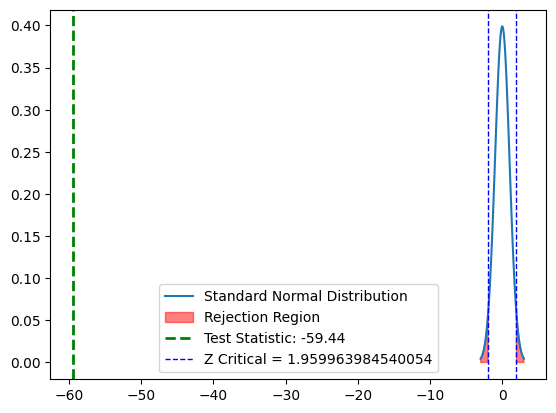

In [ ]:
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)

plt.plot(x, y, label = 'Standard Normal Distribution')
plt.fill_between(x, y, where = (x > Z_crit) | (x < -Z_crit), color = 'red', alpha = 0.5, label = 'Rejection Region')
plt.axvline(Test_stat, color = 'green', linestyle = 'dashed', linewidth = 2, label = f'Test Statistic: {Test_stat:.2f}')
plt.axvline(Z_crit, color = 'blue', linestyle = 'dashed', linewidth = 1, label = f'Z Critical = {Z_crit}')
plt.axvline(-Z_crit, color = 'blue', linestyle = 'dashed', linewidth = 1)
plt.legend()
plt.show()


## Calculating Confidence Interval

In [28]:
CI = [round((p_exp_hat - p_con_hat) - SE*Z_crit, 3), round((p_exp_hat - p_con_hat) + SE*Z_crit, 3)]
print(f'Confidence Interval of Test: ', CI[0], CI[1])

if delta <= CI[0]:
    print("Practical Significance Found")
else:
    print("Practical Significance Not Found")

Confidence Interval of Test:  0.399 0.426
Practical Significance Found


## Conclusion

Because the Test Statistic calculated and shown in the graph above is so far from the normal distribution, we can confidentely conclude that there is significant statistical and practical significance in changing the layout of the button above. The Click-Through-Rate (CTR) calculated under the histogram above also shows 19.89% for the control and 61.16% for the experimental, showing a 207.49% difference in CTR. 

Both of these values show that the CTR is far higher with the experimental button design, rejecting the Null Hypothesis that the CTRs would be the same for both. The button should be changed to the Experimental style.